In [65]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.ticker import FuncFormatter

print("Setup Complete")

Setup Complete


In [66]:
df_house = pd.read_csv('/home/apprenant/PycharmProjects/eda_maison/data/train.csv', sep=',', low_memory=False)

J'affiche les 10 premières lignes

In [67]:
df_house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Je regarde les informations de mon Dataframe

In [68]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Je supprimme les colonnes où 30% au moins des valeurs sont nulles

In [69]:
df_house = df_house.loc[:, df_house.isna().sum() <= 0.3*df_house.shape[0]]

describe les informations de SalePrice

In [70]:
df_house['SalePrice'].describe

<bound method NDFrame.describe of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>

Affichez la distribution de SalePrice avec un distplot. Conclure sur la graphique: Que pouvez vous dire?

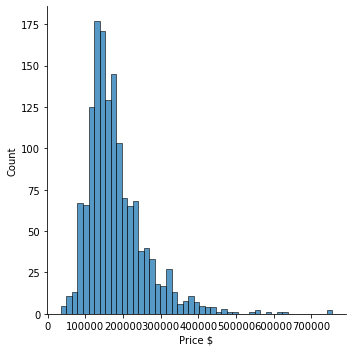

In [71]:
ax = sns.displot(data = df_house, x="SalePrice");
plt.xlabel("Price $");

# Focus variables quantitatives:

In [72]:
df_house_type = df_house.select_dtypes(include=['int64', 'float64'])

In [73]:
df_house_type.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


Sélectionnez les variables int64 + float64 afin d'afficher les histogrammes pour l'ensemble de ces variables. Qu'elles sont les variables ayant une distribution proche de SalePrice? Que peut on conclure de ces variables?

-


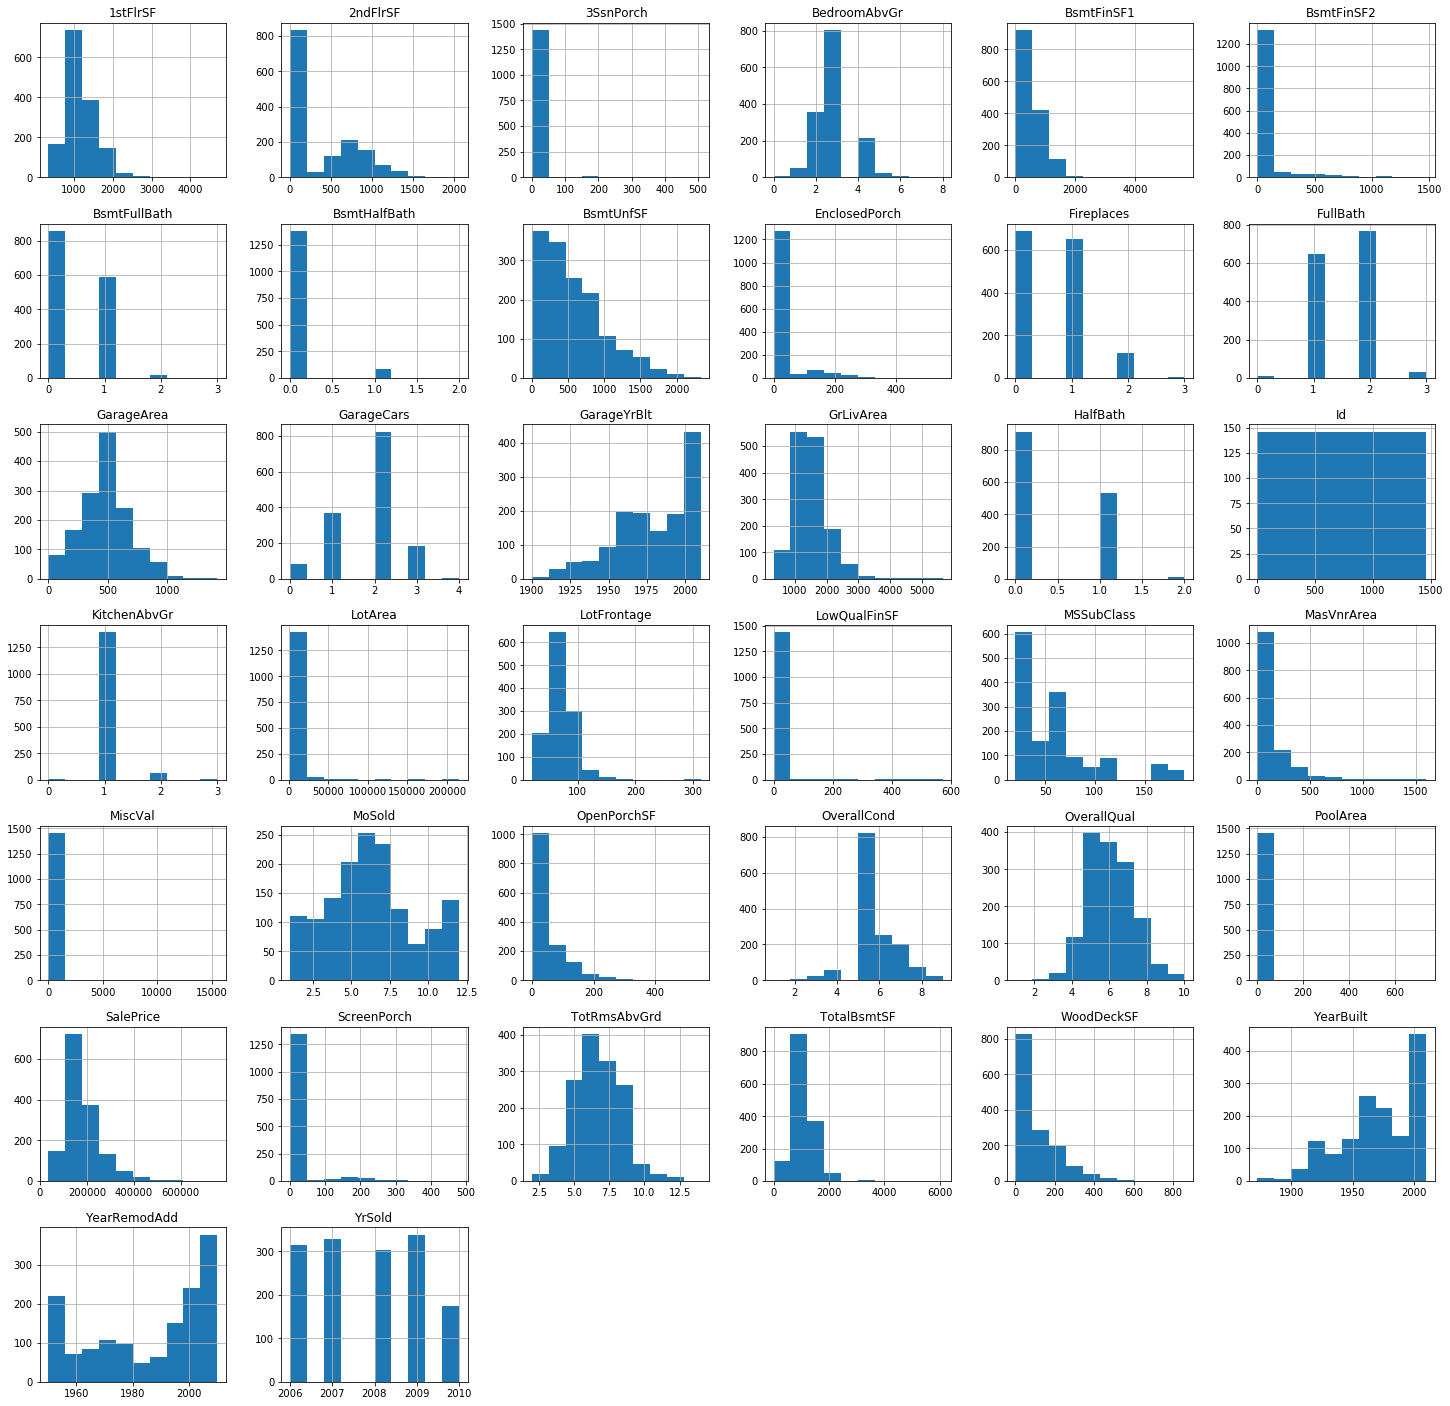

In [74]:
df_house_type.hist(figsize=(25,25))
print("-")

Les variables ayant une distribution proche de SalePrice sont GarageArea, GrLivArea, LotFrontage et 1rstFlrSF

Toujours sur les variables int64 + float64: Affichez les 10 variables les plus corrélées avec SalePrice (Avec Pandas il est possible de calculer les corrélation avec .corr()).

In [75]:
all_corr = df_house_type.corr()

In [76]:
sale_price_corr = all_corr['SalePrice']

In [77]:
sale_price_core_sort = sale_price_corr.abs().sort_values(ascending=False)
sale_price_core_sort.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Toujours sur les variables int64 + float64: Réalisez un pairplot permettant d'afficher la relation entre SalePrice et les variables sélectionnés. Qu'elle est la forme des plot croisant les 3 variables les plus corrélées avec SalePrice?

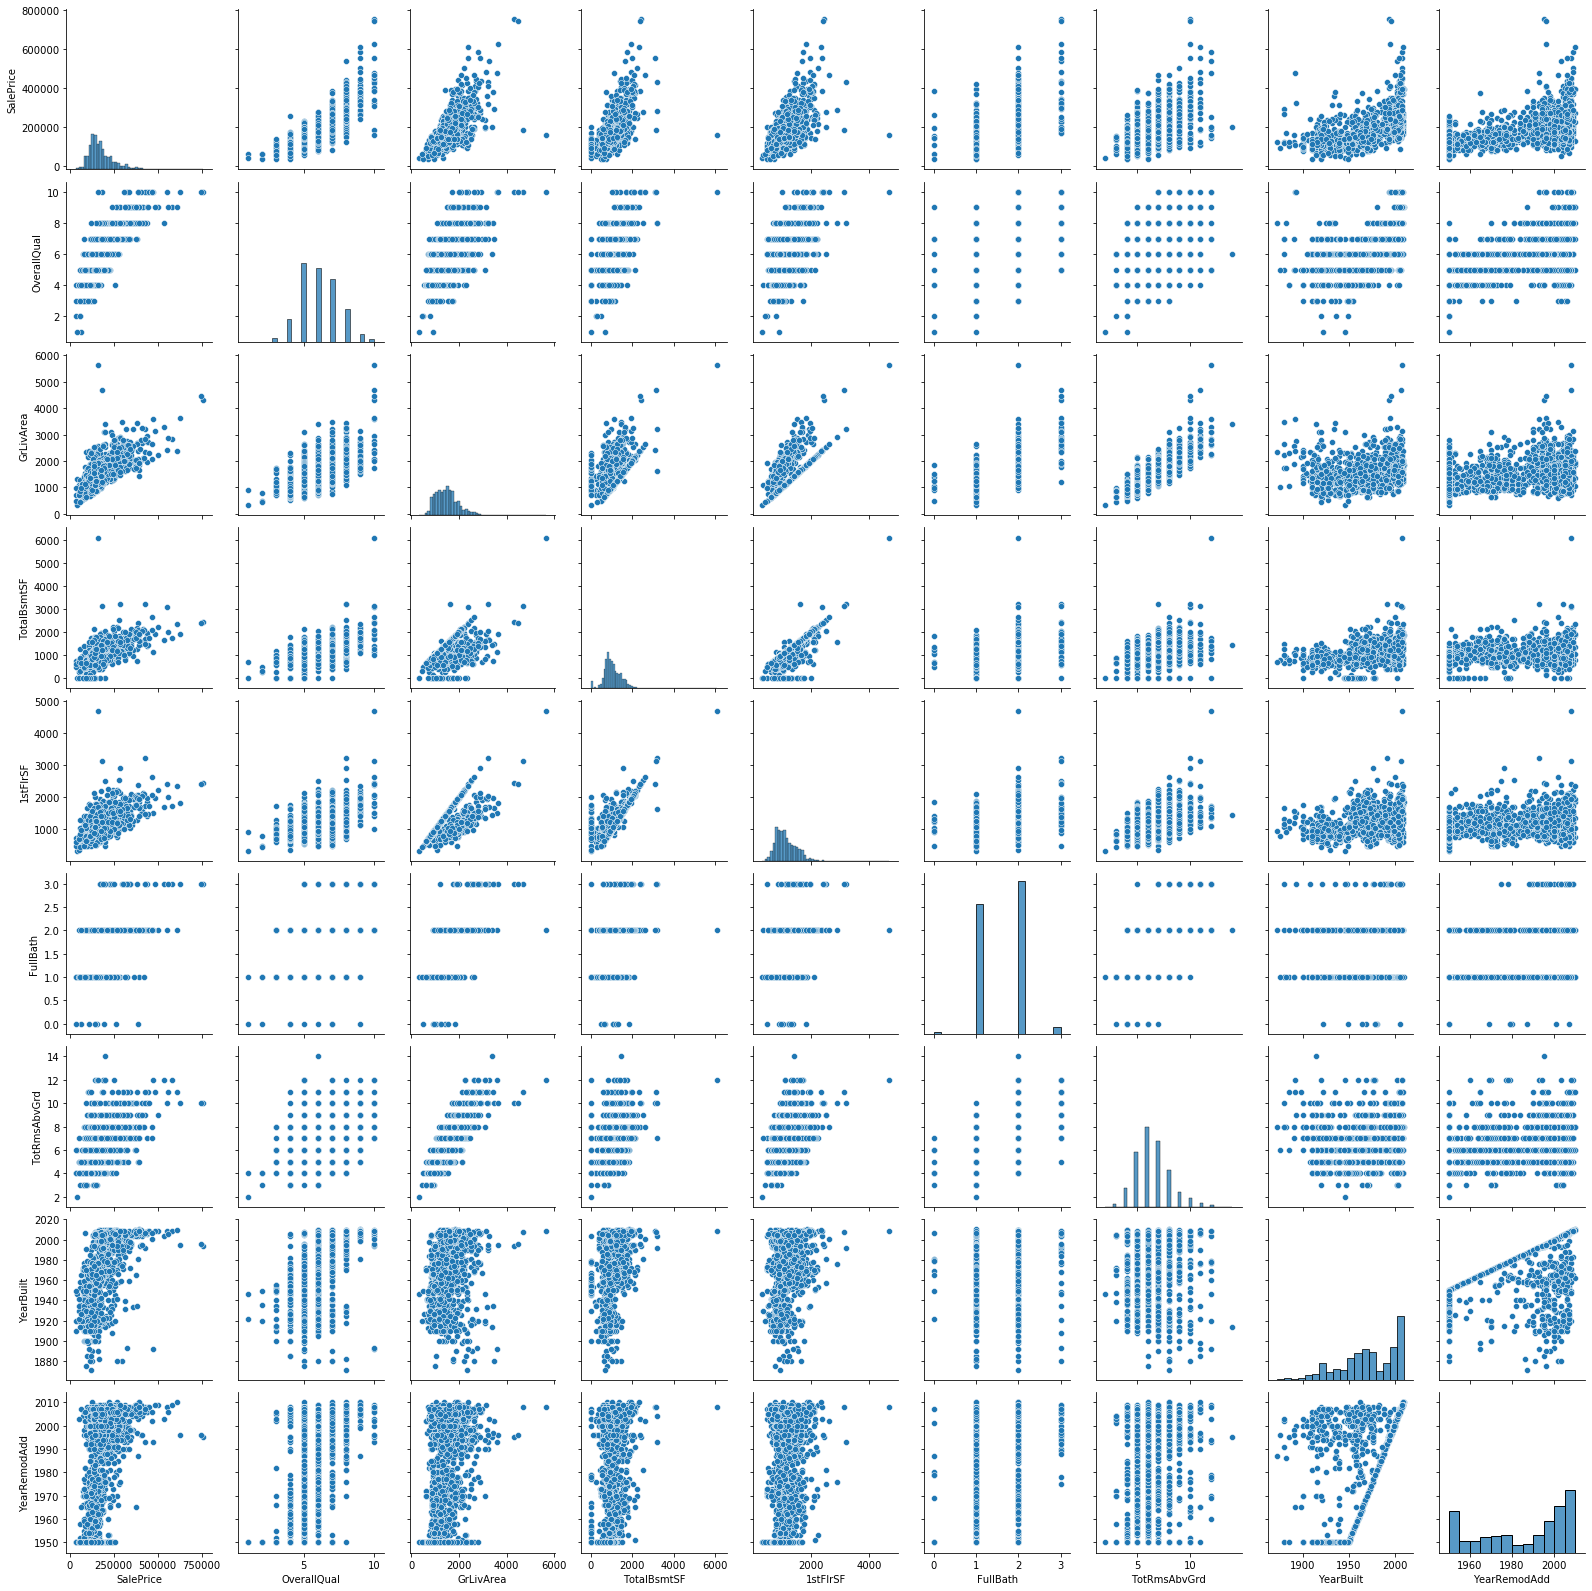

In [78]:
df_pairplot = ['SalePrice',
      'OverallQual',
      'GrLivArea', 
      'TotalBsmtSF', 
      '1stFlrSF',
      'FullBath', 
      'TotRmsAbvGrd', 
      'YearBuilt', 
      'YearRemodAdd']

plot_sale_price = df_house_type.loc[:, df_pairplot]
sns.pairplot(plot_sale_price)
plt.show;

Réalisez une heatmap afin de visualiser d'une autre manière les corrélations 2 à 2. Y'a t'il des variables fortement corrélées entre elles? Identifiez les 3 pairs les plus corrélées

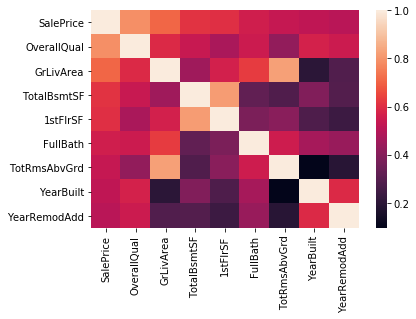

In [79]:
sns.heatmap(plot_sale_price.corr());

Sur cette sélection de variables: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] réalisez un regplot permettant de croiser ces variables avec SalePrice.

In [80]:
new_selection = ['TotalBsmtSF', 
 '1stFlrSF', 
 '2ndFlrSF', 
 'GrLivArea', 
 'FullBath', 
 'TotRmsAbvGrd', 
 'GarageCars', 
 'GarageArea', 
 'SalePrice']

In [81]:
df_new_selection = df_house.loc[:, new_selection]

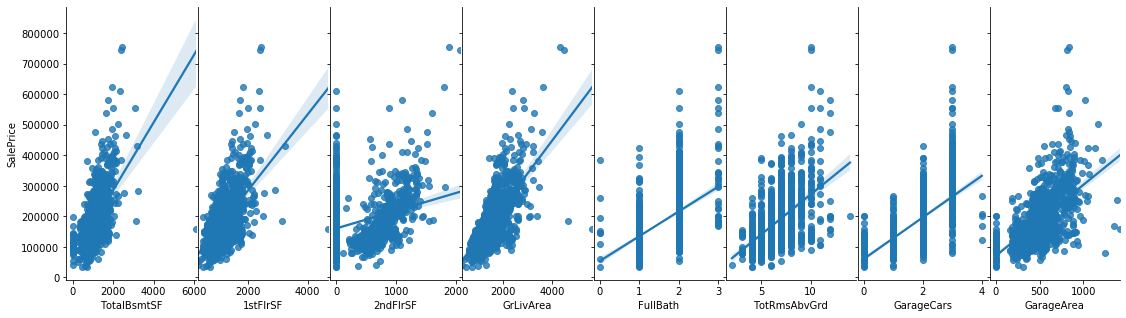

In [82]:
g = sns.PairGrid(df_new_selection, y_vars=['SalePrice'], x_vars=['TotalBsmtSF', 
 '1stFlrSF', 
 '2ndFlrSF', 
 'GrLivArea', 
 'FullBath', 
 'TotRmsAbvGrd', 
 'GarageCars', 
 'GarageArea'], height =20)
g.map(sns.regplot)
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,4)

Jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea.

coefficient de pearson:  0.502148650271804


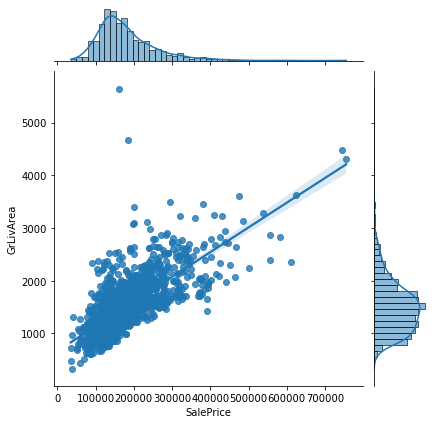

In [92]:
from scipy import stats

j = sns.jointplot(x = df_house["SalePrice"],y =df_house['GrLivArea'],kind ="reg")
print("coefficient de pearson: ",stats.pearsonr(df_house["SalePrice"],df_house['GrLivArea'])[0] **2);